In [136]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import f_oneway

base_path = r'C:\Users\avia1\Downloads\Eurovision Data Analysis'
file_names = [
    'song_data.csv',
    'country_data.csv',
    '2023_televote_results.csv',
    '2023_jury_results.csv',
    '2022_televote_results.csv',
    '2022_jury_results.csv',
    '2021_televote_results.csv',
    '2021_jury_results.csv',
    '2019_televote_results.csv',
    '2019_jury_results.csv',
    '2018_televote_results.csv',
    '2018_jury_results.csv',
    'song_data.csv',
    'country_data.csv'
]


data_frames = {}
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    df_name = os.path.splitext(file_name)[0]
    df = pd.read_csv(file_path, encoding='cp1252')
    # Normalize column names
    df.columns = [col.strip().lower() for col in df.columns]
    data_frames[df_name] = df

# Filter data for Israel
israel_data = {}
for key, df in data_frames.items():
    if 'country' in df.columns:
        # Normalize country names
        df['country'] = df['country'].str.strip().str.lower()
        israel_data[key] = df[df['country'] == 'israel']
    elif 'contestant' in df.columns:
        # Normalize contestant names
        df['contestant'] = df['contestant'].str.strip().str.lower()
        israel_data[key] = df[df['contestant'] == 'israel']
    else:
        israel_data[key] = df


# Accessing filtered data
Israel_Songs = israel_data.get('song_data', pd.DataFrame())
Israel_Televote_2023 = israel_data.get('2023_televote_results', pd.DataFrame())
Israel_Jury_2023 = israel_data.get('2023_jury_results', pd.DataFrame())
Israel_Televote_2022 = israel_data.get('2022_televote_results', pd.DataFrame())
Israel_Jury_2022 = israel_data.get('2022_jury_results', pd.DataFrame())
Israel_Televote_2021 = israel_data.get('2021_televote_results', pd.DataFrame())
Israel_Jury_2021 = israel_data.get('2021_jury_results', pd.DataFrame())
Israel_Televote_2019 = israel_data.get('2019_televote_results', pd.DataFrame())
Israel_Jury_2019 = israel_data.get('2019_jury_results', pd.DataFrame())
Israel_Televote_2018 = israel_data.get('2018_televote_results', pd.DataFrame())
Israel_Jury_2018 = israel_data.get('2018_jury_results', pd.DataFrame())

All_Songs=pd.read_csv(base_path+'\\song_data.csv',encoding='cp1252')
Countries=pd.read_csv(base_path+'\\country_data.csv',encoding='cp1252')

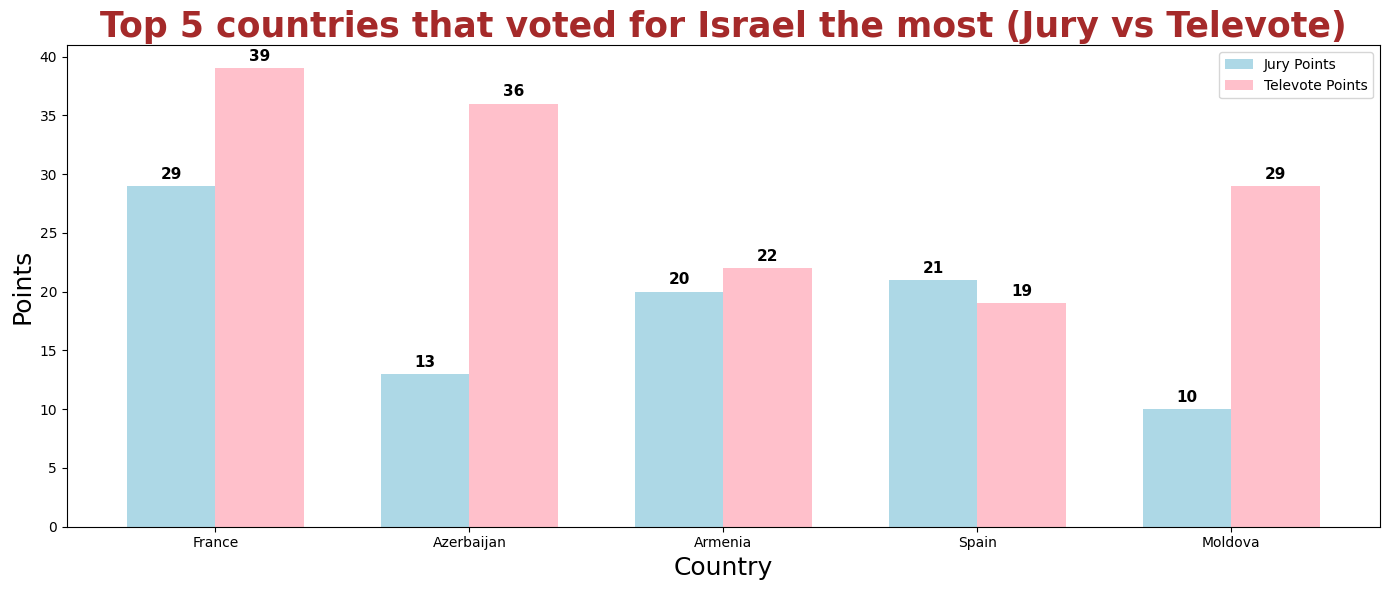

In [3]:
ignore_columns = ['total score', 'televoting score', 'jury score', 'rest of the world', 'israel', 'song_id']

jury_points_to_israel = {}
televote_points_to_israel = {}

for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    df = pd.read_csv(file_path, encoding='cp1252')
    df.columns = [col.strip().lower() for col in df.columns]  
    
    df.fillna(0, inplace=True)
    
    is_jury = 'jury' in file_name.lower()
    
   
    if 'contestant' in df.columns:
        israel_row = df[df['contestant'].str.strip().str.lower() == 'israel']
        if not israel_row.empty:
            for col in israel_row.columns:
                if col != 'contestant' and col not in ignore_columns:
                    country = col.strip().title()
                    points = israel_row.iloc[0][col]
                   
                    try:
                        points = float(points)
                        if is_jury:
                            if country not in jury_points_to_israel:
                                jury_points_to_israel[country] = 0
                            jury_points_to_israel[country] += points
                        else:
                            if country not in televote_points_to_israel:
                                televote_points_to_israel[country] = 0
                            televote_points_to_israel[country] += points
                    except ValueError:
                        pass  


jury_points_df = pd.DataFrame(list(jury_points_to_israel.items()), columns=['Country', 'Jury Points'])
televote_points_df = pd.DataFrame(list(televote_points_to_israel.items()), columns=['Country', 'Televote Points'])

points_df = pd.merge(jury_points_df, televote_points_df, on='Country', how='outer').fillna(0)


points_df['Total Points'] = points_df['Jury Points'] + points_df['Televote Points']
top_5_countries = points_df.sort_values(by='Total Points', ascending=False).head(5)


labels = top_5_countries['Country']
jury_points = top_5_countries['Jury Points']
televote_points = top_5_countries['Televote Points']

x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, jury_points, width, label='Jury Points', color='lightblue')
rects2 = ax.bar(x + width/2, televote_points, width, label='Televote Points', color='pink')


ax.set_xlabel('Country', fontsize=18)
ax.set_ylabel('Points', fontsize=18)
ax.set_title('Top 5 countries that voted for Israel the most (Jury vs Televote)', fontsize=25, color='brown', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()



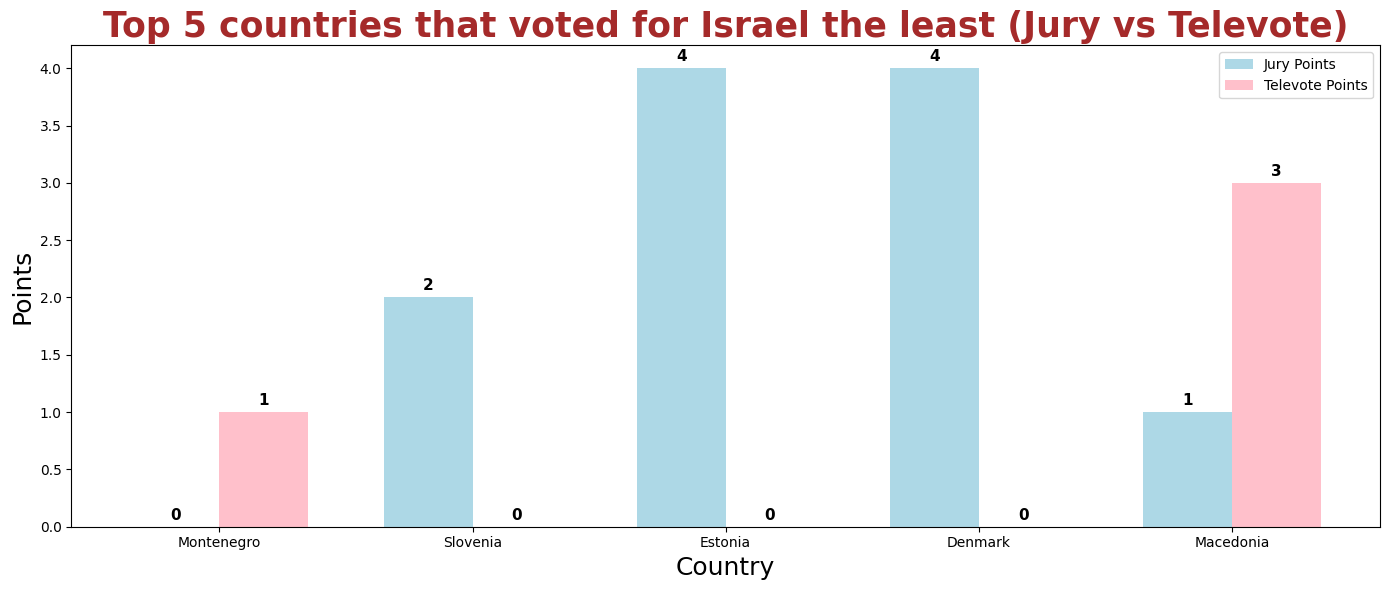

In [4]:
ignore_columns = ['total score', 'televoting score', 'jury score', 'rest of the world', 'israel', 'song_id']

# Initialize dictionaries to store the points each country gave to Israel
jury_points_to_israel = {}
televote_points_to_israel = {}

# Load each file and process the data
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    df = pd.read_csv(file_path, encoding='cp1252')
    df.columns = [col.strip().lower() for col in df.columns]  # Normalize column names
    
    # Replace NaN values with 0
    df.fillna(0, inplace=True)
    
    # Determine if the file is for jury or televote
    is_jury = 'jury' in file_name.lower()
    
    # Assuming 'Israel' is in the 'contestant' column
    if 'contestant' in df.columns:
        israel_row = df[df['contestant'].str.strip().str.lower() == 'israel']
        if not israel_row.empty:
            for col in israel_row.columns:
                if col != 'contestant' and col not in ignore_columns:
                    country = col.strip().title()
                    points = israel_row.iloc[0][col]
                    # Convert points to numeric, ignore errors
                    try:
                        points = float(points)
                        if is_jury:
                            if country not in jury_points_to_israel:
                                jury_points_to_israel[country] = 0
                            jury_points_to_israel[country] += points
                        else:
                            if country not in televote_points_to_israel:
                                televote_points_to_israel[country] = 0
                            televote_points_to_israel[country] += points
                    except ValueError:
                        pass  # Skip if points cannot be converted to float

# Convert the dictionaries to DataFrames for easier manipulation
jury_points_df = pd.DataFrame(list(jury_points_to_israel.items()), columns=['Country', 'Jury Points'])
televote_points_df = pd.DataFrame(list(televote_points_to_israel.items()), columns=['Country', 'Televote Points'])

# Merge the two DataFrames
points_df = pd.merge(jury_points_df, televote_points_df, on='Country', how='outer').fillna(0)

# Sort by total points in descending order and get the top 5 countries
points_df['Total Points'] = points_df['Jury Points'] + points_df['Televote Points']
top_5_countries = points_df.sort_values(by='Total Points').head(5)


# Plotting the results
labels = top_5_countries['Country']
jury_points = top_5_countries['Jury Points']
televote_points = top_5_countries['Televote Points']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, jury_points, width, label='Jury Points', color='lightblue')
rects2 = ax.bar(x + width/2, televote_points, width, label='Televote Points', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country', fontsize=18)
ax.set_ylabel('Points', fontsize=18)
ax.set_title('Top 5 countries that voted for Israel the least (Jury vs Televote)', fontsize=25, color='brown', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding annotations
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

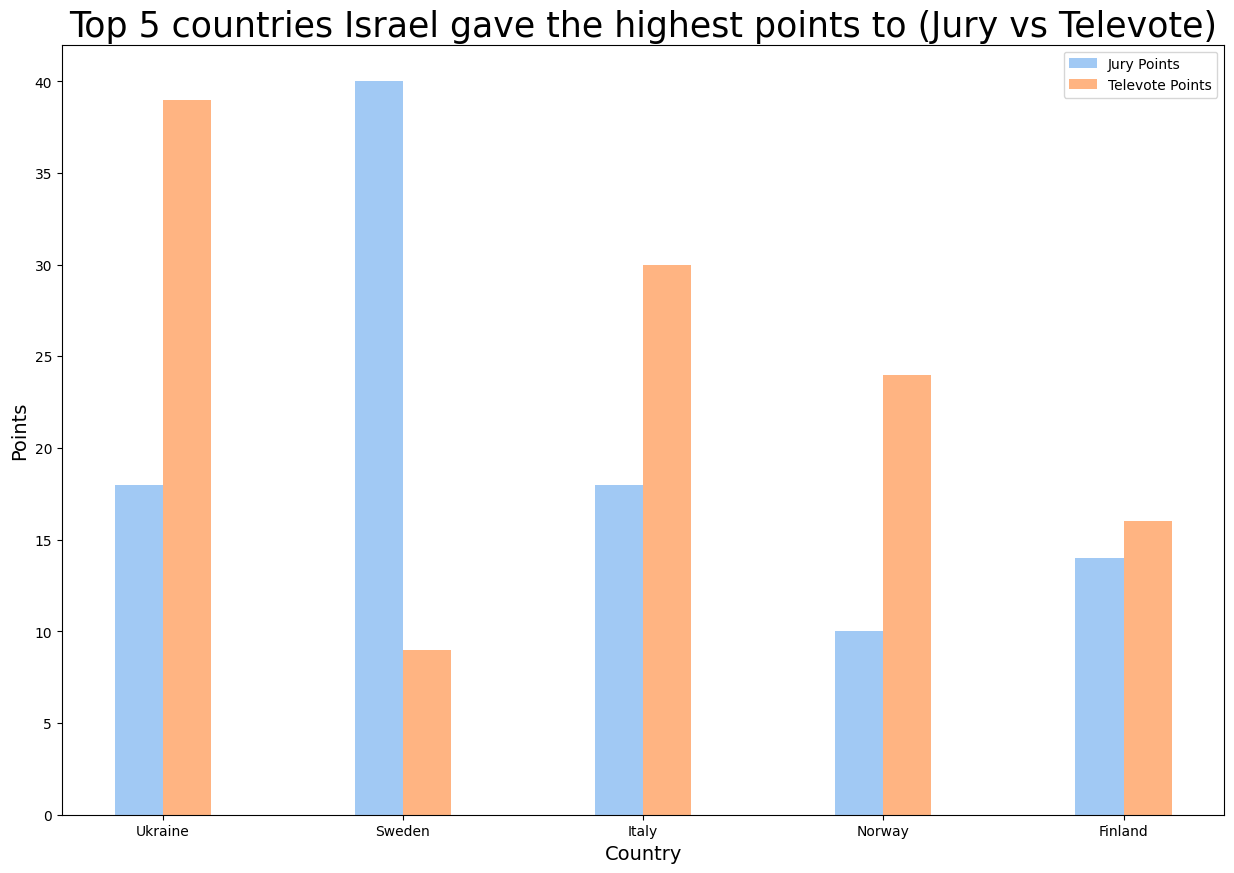

In [198]:
jury_points_from_israel = {}
televote_points_from_israel = {}
colors = sb.color_palette("hls",2)

# Load each file and process the data
for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    df = pd.read_csv(file_path, encoding='cp1252')
    df.columns = [col.strip().lower() for col in df.columns]  # Normalize column names
    
    # Replace NaN values with 0
    df.fillna(0, inplace=True)
    
    # Determine if the file is for jury or televote
    is_jury = 'jury' in file_name.lower()
    
    # Check if 'Israel' is one of the columns
    if 'israel' in df.columns:
        for index, row in df.iterrows():
            country = row['contestant'].strip().title()
            points = row['israel']
            # Convert points to numeric, ignore errors
            try:
                points = float(points)
                if is_jury:
                    if country not in jury_points_from_israel:
                        jury_points_from_israel[country] = 0
                    jury_points_from_israel[country] += points
                else:
                    if country not in televote_points_from_israel:
                        televote_points_from_israel[country] = 0
                    televote_points_from_israel[country] += points
            except ValueError:
                pass  # Skip if points cannot be converted to float

# Convert the dictionaries to DataFrames for easier manipulation
jury_points_df = pd.DataFrame(list(jury_points_from_israel.items()), columns=['Country', 'Jury Points'])
televote_points_df = pd.DataFrame(list(televote_points_from_israel.items()), columns=['Country', 'Televote Points'])

# Merge the two DataFrames
points_df = pd.merge(jury_points_df, televote_points_df, on='Country', how='outer').fillna(0)

# Sort by total points in descending order and get the top 5 countries
points_df['Total Points'] = points_df['Jury Points'] + points_df['Televote Points']
top_5_countries = points_df.sort_values(by='Total Points', ascending=False).head(5)

# Plotting the results
colors = sb.color_palette("hls",len(top_5_countries['Country']))
plt.figure(figsize=(15,10))
plt.title('Top 5 countries Israel gave the highest points to (Jury vs Televote)',fontsize=25,color='black')
plt.bar(top_5_countries['Country'],top_5_countries['Jury Points'],label='Jury Points',width=-0.2,align='edge')
plt.bar(top_5_countries['Country'],top_5_countries['Televote Points'],label='Televote Points',width=0.2,align='edge')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.legend()
countries_5=top_5_countries['Country'].unique()


In [247]:
countries_5 = top_5_countries['Country'].unique()
years=All_Songs['year']>=2018
years_2016=All_Songs['year']>=2016
filtered_songs_df = All_Songs[All_Songs['country'].str.title().isin(countries_5)&years]
filtered_songs_df.fillna(0, inplace=True)
filtered_songs_df['final_place'] = pd.to_numeric(filtered_songs_df['final_place'], errors='coerce')
filtered_countries_df = Countries[Countries['country'].str.title().isin(countries_5)]


Songs_and_Countries_merge=pd.merge(filtered_songs_df,filtered_countries_df,on='country',how='left')
Songs_and_Countries=Songs_and_Countries_merge[Songs_and_Countries_merge['country'].str.title().isin(countries_5)&years]
All_songs_and_countries=pd.merge(All_Songs,Countries,on='country',how='left')
All_songs_and_countries[years_2016].to_csv('C:\\Users\\avia1\\Downloads\\Songs and region from 2016.csv')




C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\682675061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_songs_df.fillna(0, inplace=True)
C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\682675061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_songs_df['final_place'] = pd.to_numeric(filtered_songs_df['final_place'], errors='coerce')
C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\682675061.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Songs_and_Countries=Songs_and_Countries_merge[Songs_and_Co

In [280]:
regions = {
    "Scandinavia": [
        "Denmark", "Norway", "Sweden",  
        "Finland", "Iceland"
    ],
    "Baltic Europe":[
        "Estonia", "Latvia", "Lithuania"

    ],
    "Western Europe": [
        "Belgium", "Netherlands", "Luxembourg", 
        "France", "Ireland", "United Kingdom"
        
    ],
    "Central Europe": [
        "Germany", "Austria", "Switzerland", 
        "Poland", "Czech Republic", "Slovakia", 
        "Hungary"
    ],
    "Southern Europe": [
        "Spain", "Portugal", "Italy", 
        "San Marino", 
        "Greece"
    ],
   
    "Eastern Europe": [
        "Russia", "Ukraine", "Belarus", 
        "Moldova", "Romania", "Bulgaria"
    ],
    "Balkans and Yeguslavia": [
        "Albania", "Bosnia and Herzegovina", 
        "Serbia", "Montenegro", 
        "North Macedonia", "Kosovo", "Slovenia", "Croatia"
    ],
    "Out of Europe":[
        "Israel","Azerbaijan","Armenia"
    ]

}

data = [(region, country) for region, countries in regions.items() for country in countries]

# Create DataFrame
df = pd.DataFrame(data, columns=["region", "country"])
All_songs_and_countries=pd.merge(All_Songs,df,on='country',how='left')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


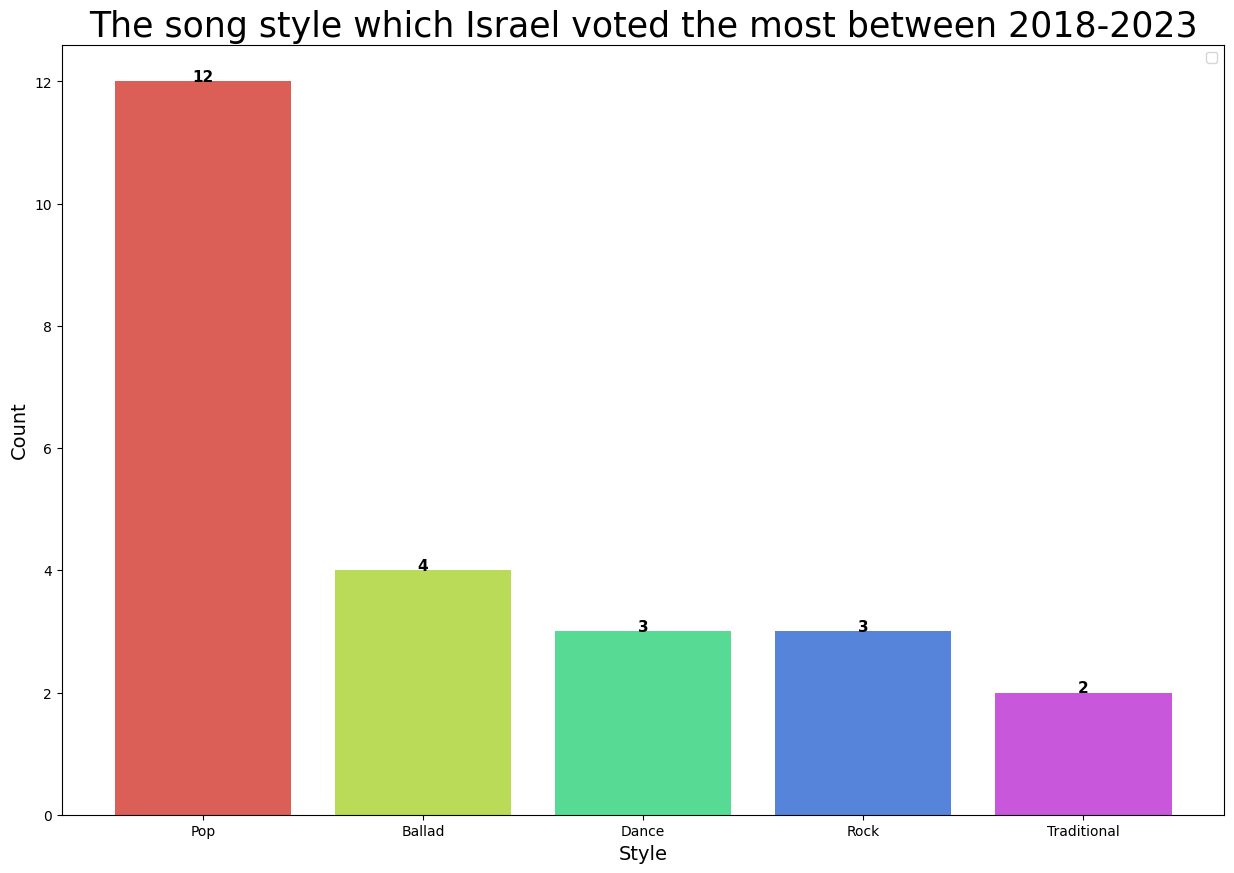

In [192]:
Style = Songs_and_Countries.groupby('style')['year'].count().reset_index().sort_values('year',ascending=False)

plt.figure(figsize=(15,10))
plt.title('The song style which Israel voted the most between 2018-2023',fontsize=25,color='black')
plt.bar(Style['style'],Style['year'],color=colors)
plt.xlabel('Style', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()

for i,j in zip(Style['style'],Style['year']):
    plt.annotate(str(round(j,2)),xy=(i,j),fontsize=11,color='black',ha='center',fontweight='bold')

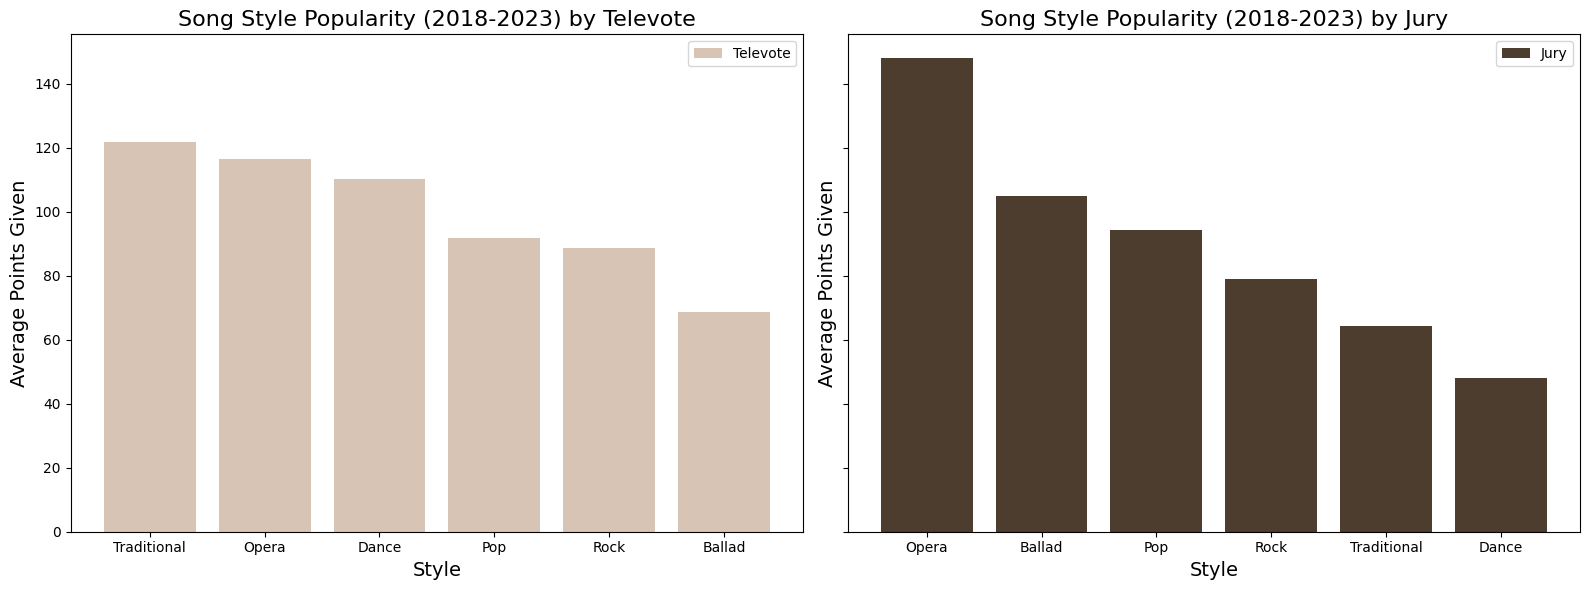

In [241]:
Favorite_Style_Televote=All_songs_and_countries.groupby('style')[['final_televote_points','final_jury_points']].mean().reset_index().sort_values('final_televote_points',ascending=False)
Favorite_Style_Jury=All_songs_and_countries.groupby('style')[['final_televote_points','final_jury_points']].mean().reset_index().sort_values('final_jury_points',ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 8, figsize=(16, 6), sharey=True)


ax1.bar(Favorite_Style_Televote['style'], Favorite_Style_Televote['final_televote_points'], color='#D8C4B4', label='Televote')
ax1.set_xlabel('Style', fontsize=14)
ax1.set_ylabel('Average Points Given', fontsize=14)
ax1.set_title('Song Style Popularity (2018-2023) by Televote', fontsize=16)
ax1.legend()


ax2.bar(Favorite_Style_Jury['style'], Favorite_Style_Jury['final_jury_points'], color='#4D3D2F', label='Jury')
ax2.set_xlabel('Style', fontsize=14)
ax2.set_ylabel('Average Points Given', fontsize=14)
ax2.set_title('Song Style Popularity (2018-2023) by Jury', fontsize=16)
ax2.legend()


plt.tight_layout()
plt.show()



In [298]:
Region_and_Style=All_songs_and_countries[years_2016].groupby(['region','style'])['year'].count().reset_index()

regions = Region_and_Style['region'].unique()

# Create subplots with a dynamic number of axes
fig, axes = plt.subplots(1, len(regions), figsize=(200, 50), sharey=True)

# Plot data for each region
for ax, region in zip(axes, regions):
    region_data = Region_and_Style[Region_and_Style['region'] == region]
    ax.bar(region_data['style'], region_data['year'], color='#D8C4B4')
    ax.set_title(f'{region}', fontsize=100)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xticklabels(region_data['style'], fontsize=100)

# Set ylabel only on the first subplot
axes[0].set_ylabel('Number of Songs', fontsize=100)

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\3481316375.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(region_data['style'], fontsize=100)
C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\3481316375.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(region_data['style'], fontsize=100)
C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\3481316375.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(region_data['style'], fontsize=100)
C:\Users\avia1\AppData\Local\Temp\ipykernel_23468\3481316375.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(region_data['style'], fo

In [4]:
import pandas as pd

# Load the CSV file
stocks_df = pd.read_csv('C:\\Users\\avia1\\Downloads\\Bike Data\\stocks.csv')

# Function to check for non-printable characters in the DataFrame
def check_non_printable(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].apply(lambda x: ''.join([i if ord(i) < 128 else ' ' for i in str(x)]))
    return df

# Apply the function to the DataFrame
stocks_df = check_non_printable(stocks_df)
stocks_df.to_csv('C:\\Users\\avia1\\Downloads\\Bike Data\\stocks cleaned.csv', index=False)

In [6]:
import pandas as pd

# Load the CSV file
stocks_cleaned_path = 'C:\\Users\\avia1\\Downloads\\Bike Data\\stocks cleaned.csv'
stocks_df = pd.read_csv(stocks_cleaned_path)

# Check for non-numeric values in the 'quantity' column
non_numeric_quantities = stocks_df[pd.to_numeric(stocks_df['quantity'], errors='coerce').isna()]

if non_numeric_quantities.empty:
    print("All values in the 'quantity' column are valid integers.")
else:
    print("The following rows have non-numeric values in the 'quantity' column:")
    print(non_numeric_quantities)

All values in the 'quantity' column are valid integers.


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('C:\\Users\\avia1\\Downloads\\Bike Data\\stocks cleaned.csv')

# Ensure quantity column is numeric, and handle errors
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop rows with invalid quantity values
df = df.dropna(subset=['quantity'])

# Convert quantity to integer
df['quantity'] = df['quantity'].astype(int)

# Save the cleaned data back to CSV
df.to_csv('C:\\Users\\avia1\\Downloads\\Bike Data\\stocks_cleaned.csv', index=False)


In [9]:
import pandas as pd

# Load the CSV file
file_path = 'C:\\Users\\avia1\\Downloads\\Bike Data\\stocks_cleaned.csv'
df = pd.read_csv(file_path)

# Check for non-numeric values in the 'quantity' column
non_numeric = df[~df['quantity'].apply(lambda x: str(x).isdigit())]

# Display non-numeric rows
print(non_numeric)


# Convert quantity to numeric, forcing errors to NaN
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop rows with NaN values in the 'quantity' column
df_cleaned = df.dropna(subset=['quantity'])

# Convert the quantity column to integer type
df_cleaned['quantity'] = df_cleaned['quantity'].astype(int)

# Save the cleaned data back to CSV
cleaned_file_path = 'C:\\Users\\avia1\\Downloads\\Bike Data\\stocks_cleaned_corrected.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)


Empty DataFrame
Columns: [store_id, product_id, quantity]
Index: []
